In [43]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Em um problema real de Redes Neurais, normalmente uma instância pode possuir inúmeras entradas, resultando em uma arquitetura de rede extensa com muitos neurônios e de múltiplas camadas. 

Um exemplo comum de aplicação nesse escopo é um classificador de imagens, em que cada entrada representa um neurônio da camada de entrada. Sabendo disso, esse notebook tem como objetivo implementar uma Rede Neural Multicamada (MLP) para o dataset MNIST. O MNIST é um dataset de dígitos escritos a mão, conforme Figura 1. 

A MLP deve ser implementada de forma a utilizar uma arquitetura simples e ainda, assim, obter uma performance elevada. Ao final, três modelos de rede devem ser implementados e comparados. Os detalhes de implementação devem ser justificados a cada questão e será dividido em 5 etapas:
* Leitura, visualização e Préprocessamento do dataset
* Conversão do array de predições Y
* Definição da topologia da rede (camadas e neurônios)
* Definir otimizador, função custo e modo do treinamento (batch, mini-batch, estocástico)
* Treinamento e avaliação de resultados

![alt text](imgs/mninst.png "Title")

# Leitura, visualização e pré-processamento do dataset

Ao utilizar Redes Neurais para imagens, cada entrada é um pixel. Dessa forma, após a leitura do dataset, precisa-se descobrir as dimensões da imagem, a quantidade de instâncias, quantas classes e entradas são necessárias para o problema.

Feito isso, algumas técnicas de pré-processamento devem ser utilizadas para melhores resultados, dentre eles converter a imagem para tons de cinza e normalizar.

Sabendo disso, retorne na célula abaixo essas informações e gere uma versão normalizada do dataset 


60000 train samples
10000 test samples


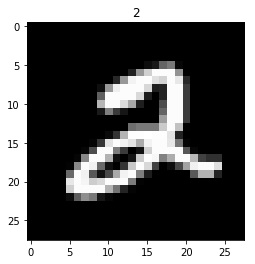

In [68]:
### leitura do dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
### Visualizar instâncias
plt.imshow(x_train[5], cmap=plt.get_cmap('gray'))
plt.title(y_train[5])
### Print - informações das instâncias
num_classes = 10
### Normalizar
x_train = x_train.reshape(60000,784).astype('float32') / 255
x_test =  x_test.reshape(10000,784).astype('float32') / 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Conversão do array de predições Y

Baseado no número de classes do problema, represente a saída como one-hot encoding. Indique a importância dessa representação.

In [71]:
def one_hot(true_labels,num_classes):
    """
    Função que implementa o one-hot encoding
    Entrada: true_labels - array original com os labels
    Retorna: labels - conversão one-hot          
    """
    labels = keras.utils.to_categorical(true_labels, num_classes)
    return labels

y_train_oh = one_hot(y_train, num_classes)
y_test_oh = one_hot(y_test, num_classes)

#print(x_train[5])
#print(y_train_oh[5])

# Definição de Topologia da Rede

Mostre as três arquiteturas que serão utilizadas para resolver o problema. As arquiteturas devem ser simples de forma a retornar bons resultados com a menor quantidade necessária de neurônios e camadas. As três arquiteturas devem variar apenas quanto ao número de neurônios e camadas (incluindo regularização). Baseado nisso, explique:
* Quantos neurônios serão utilizados em cada camada?
* Quantas camadas serão utilizadas?
* É necessário utilizar regularização? Se sim explique a técnica que foi utilizada e o impacto nos resultados
* Qual função de ativação será utilizada? Escolha duas funções de ativação e explique os resultados obtidos

## Arquitetura 1

In [72]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_55 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_56 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


ValueError: Error when checking target: expected dense_56 to have shape (10,) but got array with shape (1,)

# Definir otimizador, função custo e modo do treinamento

Uma Rede Neural é um problema de otimização, sabendo disso, explique:
* Qual otimizador será utilizado? Escolha dois otimizadores, explique a diferença entre eles justificando a escolha e comente os resultados obtidos.
* Será necessário utilizar uma função custo? Explique o que é uma função custo e qual será utilizada justificando a escolha.
* Qual modo de treinamento foi utilizado? Justifique sua resposta
* Quantas épocas serão necessárias? Caso os métodos por batch ou mini-batch sejam escolhidos, indique também o tamanho



# Treinamento e avaliação dos resultados

Treine as três redes e mostre os resultados de cada uma a partir das questões anteriores.
